In [2]:
import numpy as np

class Parceptron:
    def __init__(self, edu = 0.01, n_iter = 10): 
        self.edu = edu
        self.n_iter = n_iter
        
    def fit(self,x,y):

        self.w_ = np.zeros(1 + x.shape[1]) 
        self.errors_ = []
        for _ in range(self.n_iter): 
            errors = 0
            for xi, target in zip(x, y):
                update = self.edu * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors) 
        return self
    
    def net_input(self, x):
        return np.dot(np.array(x),self.w_[1:]) + self.w_[0]
    def predict(self, x):
        return np.where(self.net_input(x) >= 0.0, 1, -1)

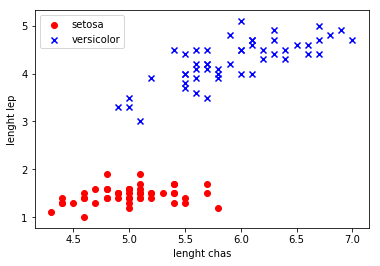

In [3]:
import pandas as pd 
import matplotlib.pyplot as plt

url = 'https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv'
df = pd.read_csv(url, header = None)

y = df.iloc[1:101,4].values
y = np.where(y == 'setosa', -1, 1)
x = df.iloc[1:101,[0,2]].values
x = x.astype(float)

plt.scatter(x[:50,0],x[:50,1],color="red",marker="o",label = "setosa" )
plt.scatter(x[50:100,0],x[50:100,1],color="blue",marker="x",label = "versicolor" )
plt.xlabel("lenght chas")
plt.ylabel("lenght lep")

plt.legend(loc = "best")
plt.show()



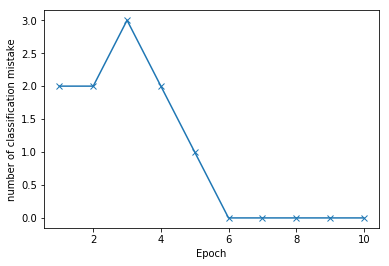

In [4]:
ppn = Parceptron(0.1,10)

ppn.fit(x,y)
plt.plot(range(1,len(ppn.errors_)+1), ppn.errors_,marker="x" )
plt.xlabel("Epoch")
plt.ylabel("number of classification mistake")
plt.show()

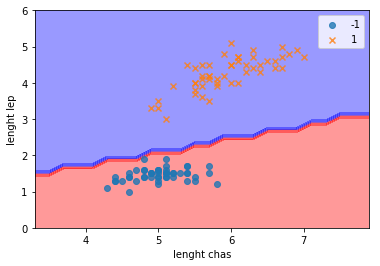

In [5]:
import func as f 

f.plot_desicion_regions(x,y,classifier = ppn)
plt.xlabel("lenght chas")
plt.ylabel("lenght lep")
plt.legend(loc ="best")
plt.show()